In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import ipywidgets
from ipywidgets import interact,interact_manual

In [2]:
df=pd.read_csv("books.csv",on_bad_lines="skip")

In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
df.columns=df.columns.str.strip()


In [5]:
df.describe(include="object")

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [6]:
df["isbn"].nunique()

11123

In [7]:
df.size

133476

In [8]:
df.drop(columns=["isbn","isbn13"],axis=True,inplace=True)

In [9]:
df.drop(["bookID"],axis=True,inplace=True)

In [10]:
df["year"]=df["publication_date"].str.split("/").str[2]
#df["year"]=df["year"].apply(lambda x: x[2])

In [11]:
df["year"]=df["year"].astype(int)

In [12]:
df.drop(["publication_date"],axis=1,inplace=True)

In [13]:
year=df["year"].unique()
year_books=df["year"].value_counts().values

In [14]:
pd.DataFrame({"year_pub":year,
             "No. of books":year_books})

,year_pub,No. of books
0,2006,1700
1,2004,1260
2,2003,1069
3,2005,931
4,2002,798
...,...,...
82,1967,1
83,1900,1
84,2020,1
85,1931,1


<function matplotlib.pyplot.show(close=None, block=None)>

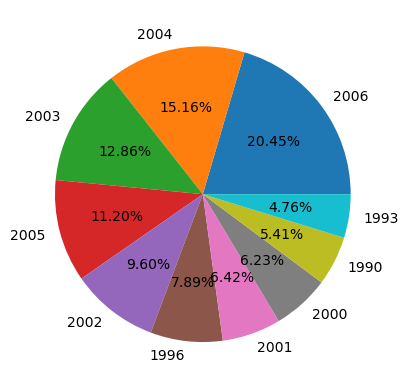

In [14]:
plt.pie(year_books[:10],labels=year[:10],autopct='%1.2f%%')
plt.show

In [15]:
year_books

array([1700, 1260, 1069,  931,  798,  656,  534,  518,  450,  396,  290,
        250,  249,  220,  183,  165,  151,  118,  117,   88,   77,   73,
         72,   62,   49,   45,   42,   37,   36,   34,   32,   31,   31,
         26,   24,   24,   21,   17,   16,   16,   15,   14,   13,   12,
         11,   11,   10,    9,    9,    9,    7,    6,    6,    6,    6,
          5,    5,    5,    4,    4,    4,    4,    3,    3,    3,    3,
          3,    2,    2,    2,    2,    2,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
      dtype=int64)

In [16]:
n_auhtors=df['authors'].value_counts().values

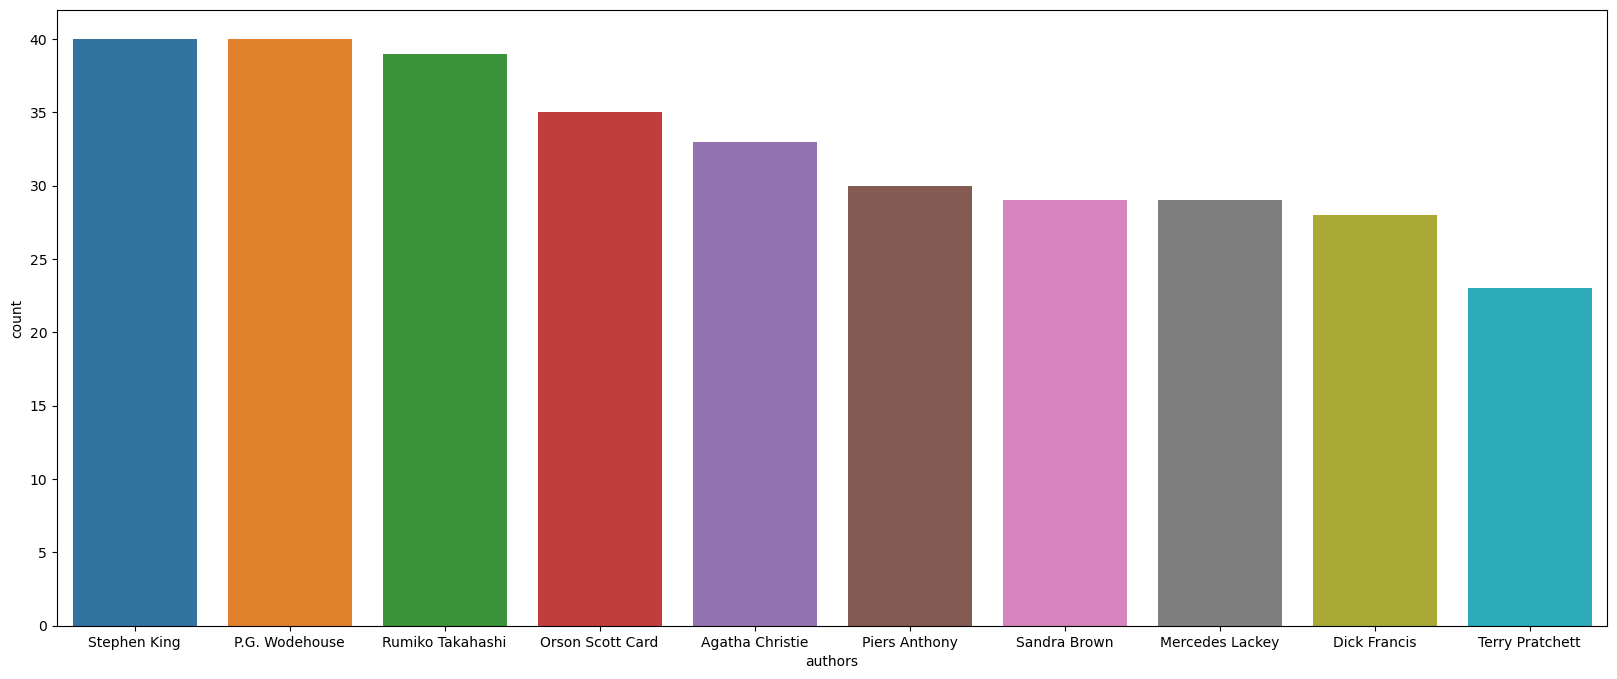

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(x='authors',data=df,order=df["authors"].value_counts().index[:10])
plt.show()

In [19]:
order=df["authors"].value_counts().values[:10]
order

array([40, 40, 39, 35, 33, 30, 29, 29, 28, 23], dtype=int64)

<Axes: xlabel='average_rating', ylabel='Density'>

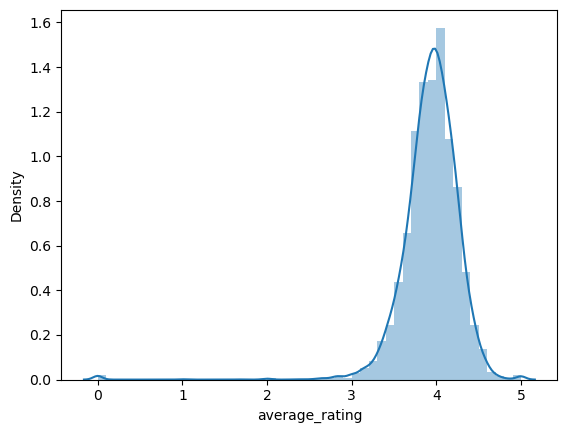

In [25]:
sns.distplot(df['average_rating'])

In [42]:
pivot_df.sort_index(ascending=False)

authors,Agatha Christie,Dick Francis,Mercedes Lackey,Orson Scott Card,P.G. Wodehouse,Piers Anthony,Rumiko Takahashi,Sandra Brown,Stephen King,Terry Pratchett
average_rating,,,,,,,,,,
4.07,0,1,0,2,0,0,0,0,0,1
4.05,3,2,1,0,1,0,1,0,0,1
4.02,0,0,2,0,2,0,0,1,5,0
4.00,0,2,0,0,0,0,0,0,2,1
3.96,0,2,0,0,0,1,0,0,5,0
3.94,2,1,1,0,0,0,0,1,0,1
3.93,0,0,0,0,2,0,0,0,2,0
3.92,1,0,0,0,0,0,0,3,3,1
3.89,0,1,0,1,2,0,0,0,0,0


In [59]:
top_title=df['title'].value_counts().head(20)
top_title_count=df['title'].value_counts().values[:20]

In [70]:
df[df["average_rating"]==df["average_rating"].max()][['authors', 'average_rating', 'language_code']]

,authors,average_rating,language_code
624,Aristophanes/F.W. Hall/W.M. Geldart,5.0,grc
786,Julie Sylvester/David Sylvester,5.0,eng
855,Tara MacCarthy,5.0,eng
1243,Middlesex Borough Heritage Committee,5.0,eng
4125,Tim Bogenn,5.0,eng
4788,John Diamond,5.0,eng
4933,Elena N. Mahlow,5.0,eng
5023,Ian Martin/Katie Elliott,5.0,eng
5474,NOT A BOOK,5.0,eng
5476,NOT A BOOK,5.0,eng


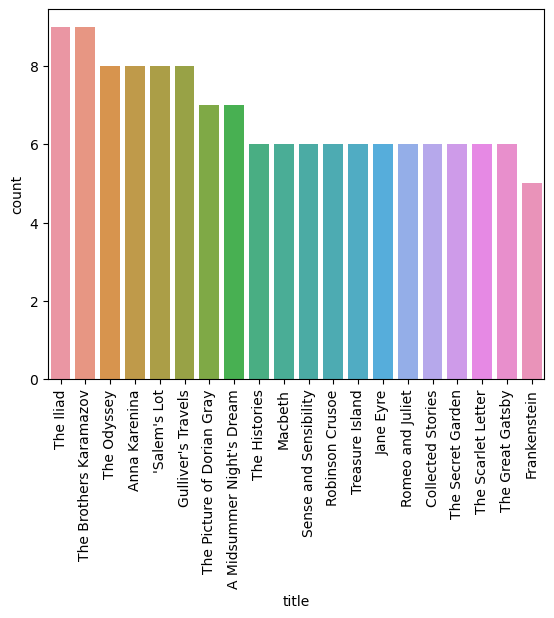

In [62]:
sns.barplot(x=top_title.index, y=top_title)
plt.xticks(rotation=90)
plt.show()
# sns.barplot(x=top_titles.index, y=top_titles)

# RECOMMENDING BOOK BASED ON LANGUAGE,AUHTOR,PUBLISHERS

In [87]:
@interact
def recommend_book_publisher(x=list(df['publisher'].value_counts().index)):
    a=df[df["publisher"]==x][['title','average_rating']]
    a=a.sort_values(by='average_rating',ascending=False)
    return a.head(10)
    

interactive(children=(Dropdown(description='x', options=('Vintage', 'Penguin Books', 'Penguin Classics', 'Mari…

In [95]:
def rating_obj(x):
    if x>=4 and x<=5:
        return 'between 4 and 5'
    if x>=3 and x<4:
        return 'between 3 and 4'
    if x>=2 and x<3:
        return 'between 2 and 3'
    if x>=1 and x<2:
        return 'between 1 and 2'
    if x>=0 and x<1:
        return 'between 0 and 1'
    
    

In [97]:
rating_df=df['average_rating'].apply(rating_obj)

In [102]:
ratings=pd.get_dummies(rating_df)

In [104]:
ratings['between 0 and 1']=ratings['between 0 and 1'].map({False: 0,True: 1})

In [105]:
ratings

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,False,False,False,True
1,0,False,False,False,True
2,0,False,False,False,True
3,0,False,False,False,True
4,0,False,False,False,True
...,...,...,...,...,...
11118,0,False,False,False,True
11119,0,False,False,False,True
11120,0,False,False,True,False
11121,0,False,False,True,False


In [106]:
ratings['between 1 and 2']=ratings['between 1 and 2'].map({False: 0,True: 1})
ratings['between 2 and 3']=ratings['between 2 and 3'].map({False: 0,True: 1})
ratings['between 3 and 4']=ratings['between 3 and 4'].map({False: 0,True: 1})

KeyError: 'between 4 and 4'

In [108]:
ratings['between 4 and 5']=ratings['between 4 and 5'].map({False: 0,True: 1})

In [109]:
ratings

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
11118,0,0,0,0,1
11119,0,0,0,0,1
11120,0,0,0,1,0
11121,0,0,0,1,0


In [118]:
lang=pd.get_dummies(df['language_code'],dtype=int)

In [124]:
ratings

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
11118,0,0,0,0,1
11119,0,0,0,0,1
11120,0,0,0,1,0
11121,0,0,0,1,0


In [129]:
feature=pd.concat([df['title'],df['average_rating'],df['ratings_count'],ratings,lang],axis=1)

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
feature_scaled=scaler.fit_transform(feature)

In [138]:
feature=feature.set_index('title')

In [142]:
from sklearn import neighbors

In [144]:
model=neighbors.NearestNeighbors(n_neighbors=5,algorithm='ball_tree',metric='euclidean')
model.fit(feature_scaled)
dist,idlist=model.kneighbors(feature_scaled)

In [155]:
@interact
def BookRecommend(book=list(df['title'].value_counts().index)):
                  book_name=[]
                  book_id=df[df["title"]==book].index
                  book_id=book_id[0]
                  for new_id in idlist[book_id]:
                      book_name.append(df.loc[new_id].title)
                  return book_name

interactive(children=(Dropdown(description='book', options=('The Iliad', 'The Brothers Karamazov', 'The Odysse…

In [150]:
book_id=book_id[0]
book_id

11121

In [151]:
idlist[book_id]

array([11121,  1463,  8854,  7565,  7079], dtype=int64)